In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('admission_predict_dataset.csv') #load the dataset
df.head()  #display the first 5 rows of the dataset - in bracket u can mention the number of rows to be displayed


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape #shows total row's and columns of our datset

(500, 9)

In [4]:
df.tail() #returns the last 5 row's of our datset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
df.columns #mention's all the column names from dataset 

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.info() #basic info from every column of our dataset
df.describe().T #returns the statistical info of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [31]:
df.dtypes  #returns the datatypes's

GRE                    int64
TOEFL                  int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Probability          float64
dtype: object

In [8]:
df.isnull().any() #it returns true if any column has null values else false

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [9]:
df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'LOR ': 'LOR', 'Chance of Admit ': 'Probability'}) #now i will rename those columns according to my convienence
df.head(20)  #first 20 rows will be returned

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


# Data Visualization



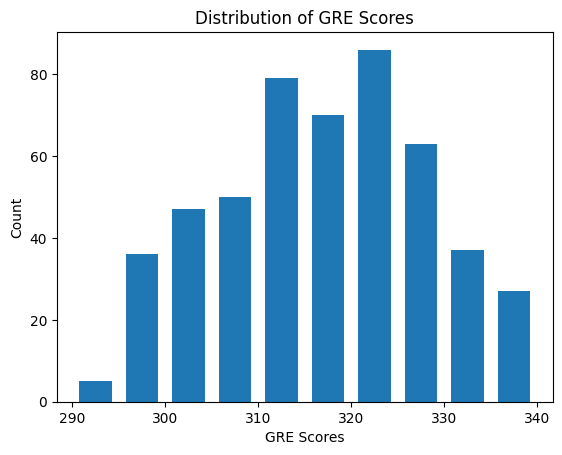

In [10]:
fig = plt.hist(df['GRE'], rwidth=0.7) #visualizing HIST plot for GRE score
plt.title("Distribution of GRE Scores")
plt.xlabel('GRE Scores') 
plt.ylabel('Count') 
plt.show()

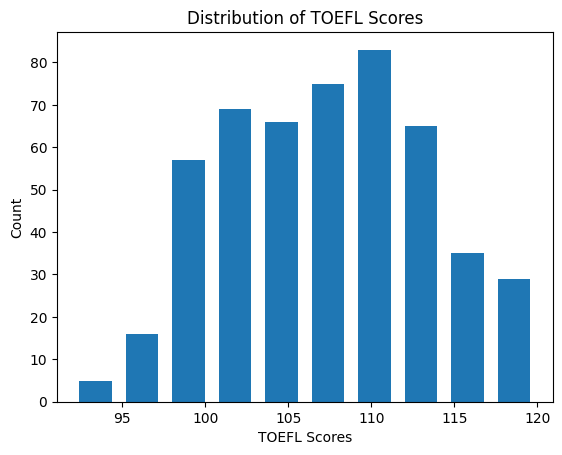

In [11]:
fig = plt.hist(df['TOEFL'], rwidth=0.7)  #hist plot for TOEFL column
plt.title('Distribution of TOEFL Scores')
plt.xlabel('TOEFL Scores')
plt.ylabel('Count')
plt.show()

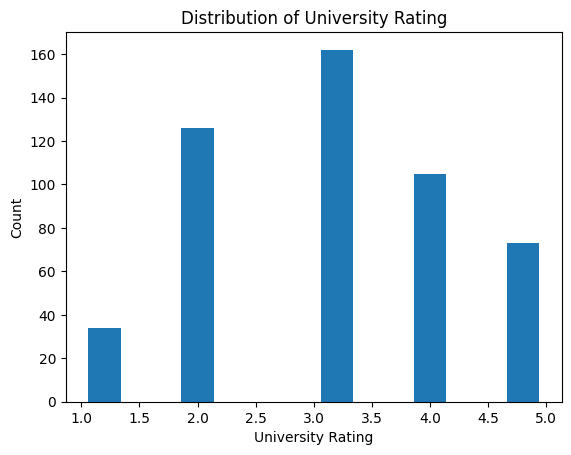

In [12]:
fig = plt.hist(df['University Rating'], rwidth=0.7)  #plot for University Rating 
plt.title('Distribution of University Rating')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

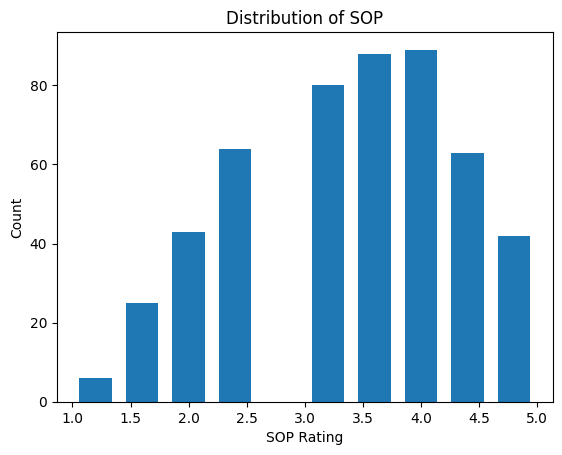

In [13]:
fig = plt.hist(df['SOP'], rwidth=0.7) 
plt.title('Distribution of SOP')
plt.xlabel('SOP Rating')
plt.ylabel('Count')
plt.show() 

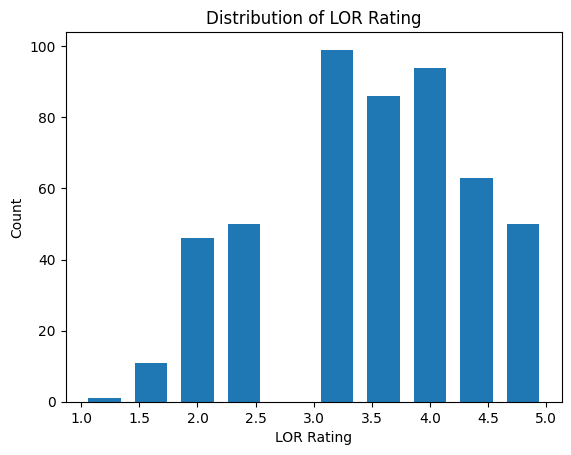

In [14]:
fig = plt.hist(df['LOR'], rwidth=0.7)
plt.title('Distribution of LOR Rating')
plt.xlabel('LOR Rating')
plt.ylabel('Count')
plt.show()

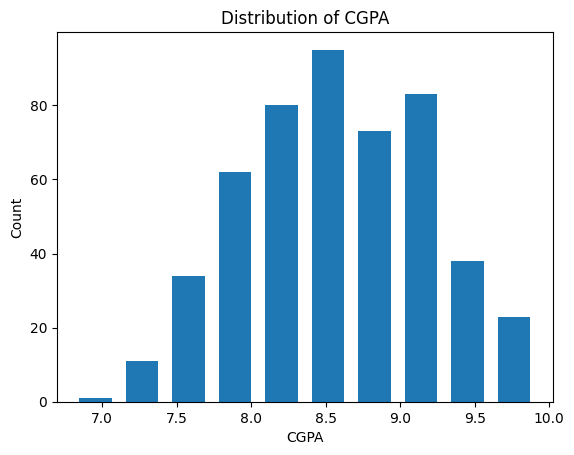

In [15]:
fig = plt.hist(df['CGPA'], rwidth=0.7)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

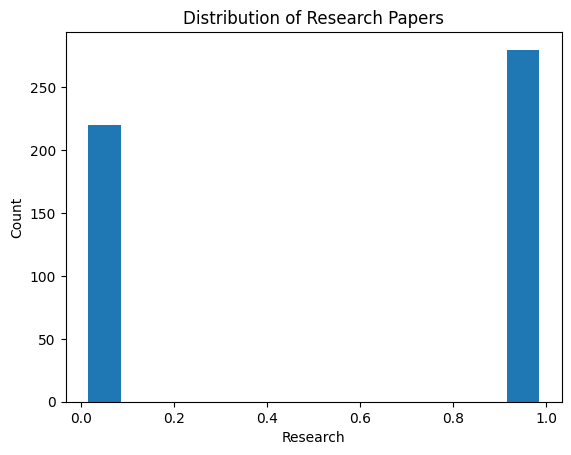

In [16]:
fig = plt.hist(df['Research'], rwidth=0.7)
plt.title('Distribution of Research Papers')
plt.xlabel('Research')
plt.ylabel('Count')
plt.show()

# DATA CLEANING

In [17]:
#we will clean the dataset -  we will remove columns which are not useful for us!!
df.drop('Serial No.', axis='columns', inplace=True)        #here we removed serial no. column which isnt useful for us.
df.head()   

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
df_copy = df.copy(deep=True)
df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']] = df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']].replace(0, np.nan)
df_copy.isnull().sum()   #removing 0's from these column's and replacing them with NaN

GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

# Model Building


In [19]:
x = df_copy.drop('Probability', axis='columns')
y = df_copy['Probability']  #split the dataset into features(x) and label(y) 
#here except probability all other columns are considered as x (we used copy.drop()) and in y as the target /  label we considered probability

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy: ", model.score(x_test, y_test))

    score = cross_val_score(model, x, y, cv=5)
    print("Cross Validation Score: ", np.mean(score))  
 

In [21]:
from sklearn.linear_model import LinearRegression    #using Linear Regression model here
model = LinearRegression()
classify(model)
 

Accuracy:  0.8188432567829629
Cross Validation Score:  0.8108015220863887


In [22]:
from sklearn.linear_model import Lasso

model = Lasso()
classify(model)


Accuracy:  0.2554048110843906
Cross Validation Score:  0.2150875751935711


In [23]:
from sklearn.svm import SVR

model = SVR()
classify(model)


Accuracy:  0.6489352664633703
Cross Validation Score:  0.6540993483266154


In [24]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
classify(model)


Accuracy:  0.5688508557457214
Cross Validation Score:  0.5646540018125583


In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
classify(model)


Accuracy:  0.7899297163814181
Cross Validation Score:  0.7838808409748004


In [26]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
classify(model)


Accuracy:  0.7247745721271395
Cross Validation Score:  0.6994391546577733


In [27]:
from xgboost import XGBRegressor
model = XGBRegressor()
classify(model)


Accuracy:  0.7466918068265556
Cross Validation Score:  0.7315215839331277


In [28]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
classify(model)


Learning rate set to 0.035425
0:	learn: 0.1371264	total: 140ms	remaining: 2m 19s
1:	learn: 0.1339896	total: 142ms	remaining: 1m 10s
2:	learn: 0.1310893	total: 143ms	remaining: 47.6s
3:	learn: 0.1283848	total: 145ms	remaining: 36.1s
4:	learn: 0.1254306	total: 147ms	remaining: 29.2s
5:	learn: 0.1224642	total: 148ms	remaining: 24.5s
6:	learn: 0.1197913	total: 149ms	remaining: 21.2s
7:	learn: 0.1173841	total: 151ms	remaining: 18.8s
8:	learn: 0.1149049	total: 153ms	remaining: 16.9s
9:	learn: 0.1123858	total: 155ms	remaining: 15.4s
10:	learn: 0.1099706	total: 157ms	remaining: 14.1s
11:	learn: 0.1078134	total: 158ms	remaining: 13s
12:	learn: 0.1056570	total: 160ms	remaining: 12.1s
13:	learn: 0.1036730	total: 161ms	remaining: 11.4s
14:	learn: 0.1017312	total: 163ms	remaining: 10.7s
15:	learn: 0.0997400	total: 165ms	remaining: 10.2s
16:	learn: 0.0980080	total: 167ms	remaining: 9.68s
17:	learn: 0.0962271	total: 169ms	remaining: 9.23s
18:	learn: 0.0944987	total: 171ms	remaining: 8.82s
19:	learn: 

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
classify(model)


Accuracy:  0.8006039902200489
Cross Validation Score:  0.7655411291461396


##### so we have tested diff models from linear regression, KNN, SVC, LASSO to XGBOOST, CATBOOST, etc .. at last compared with all acuuracy and cross validation score the best one is Linear Regression

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)
print(len(x_train), len(x_test))   #so as we know there are total of 500 rows 
#here the dataset is divided into two parts - 1)training(80%)  2)testing (20%)

400 100


In [34]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8214787365889663

#### Predicting the values using our trained model


In [35]:
#prediction1 - input the values for model prediction as the same datset columns like  GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research


input_data = pd.DataFrame([[337, 118, 4, 4.5, 4.5, 9.65, 1]], columns=x.columns)
print('Chance of getting into UCLA is {}%'.format(round(model.predict(input_data)[0] * 100, 3)))


Chance of getting into UCLA is 95.227%


In [36]:
input_data = pd.DataFrame([[320, 113, 2, 2.0, 2.5, 8.64, 1]],
columns=['GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'])

print('Chance of getting into UCLA is {}%'.format(round(model.predict(input_data)[0] * 100, 3)))


Chance of getting into UCLA is 73.627%


In [ ]:
import joblib #using joblib we can save the predicted model into a file.

joblib.dump(model, 'admission_prediction_model.pkl')
print("Model Saved Successfully!")

Model Saved Successfully!


#### The training of the model is saved into a file using joblib.
#### Now, let's deploy this model on the web using Streamlit.

